<p>Есть фактор X который влияет на Y</p>
<p>Мы предполагаем, что есть еще промежуточный фактор M</p>
<p>Нужно оценить его влияние</p>

In [8]:
import pandas as pd
data = pd.read_csv('http://static.lib.virginia.edu/statlab/materials/data/mediationData.csv')
data.head()

,X,M,Y
0,6,5,6
1,7,5,5
2,7,7,4
3,8,4,8
4,4,3,5


определим влияние X на Y

In [90]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats


X = np.array(data['X']).reshape((-1, 1))
y = data['Y']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est_X_Y = est.fit()
print(est_X_Y.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     12.70
Date:                Mon, 13 Jan 2020   Prob (F-statistic):           0.000567
Time:                        13:52:52   Log-Likelihood:                -206.56
No. Observations:                 100   AIC:                             417.1
Df Residuals:                      98   BIC:                             422.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8572      0.693      4.122      0.0

т.о. b1 = 0,3961

определим влияние X на M

In [91]:
X = np.array(data['X']).reshape((-1, 1))
M = data['M']

X2 = sm.add_constant(X)
est = sm.OLS(M, X2)
est_X_M = est.fit()
print(est_X_M.summary())

                            OLS Regression Results                            
Dep. Variable:                      M   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     35.26
Date:                Mon, 13 Jan 2020   Prob (F-statistic):           4.39e-08
Time:                        13:53:02   Log-Likelihood:                -190.30
No. Observations:                 100   AIC:                             384.6
Df Residuals:                      98   BIC:                             389.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4995      0.589      2.545      0.0

b2 = 0.5610

Мы хотим, чтобы M влияло на Y, но X больше не влияло на Y (или X все еще влияло на Y, но в меньшей степени). Если эффект опосредования существует, влияние X на Y исчезнет (или, по крайней мере, ослабнет), когда M включен в регрессию.

In [92]:
X = np.column_stack([list(data['X']),list(data['M'])])
Y = np.array(data['Y'])
X = sm.add_constant(X, prepend=True) #add a constant
#X2 = sm.add_constant(X)
est = sm.OLS(Y,X)
est_XM_Y = est.fit()
print(est_XM_Y.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     28.85
Date:                Mon, 13 Jan 2020   Prob (F-statistic):           1.47e-10
Time:                        13:53:12   Log-Likelihood:                -189.31
No. Observations:                 100   AIC:                             384.6
Df Residuals:                      97   BIC:                             392.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9043      0.605      3.145      0.0

<p>b4 = 0.0396 (влияние X на Y исчезло)</p>
b3 = 0.6355

Если влияние X на Y полностью исчезает, M полностью опосредует X и Y ( полное опосредование ). Если влияние X на Y все еще существует, но в меньшей степени, M частично опосредует между X и Y ( частичное опосредование ).

Как только мы находим эти отношения, мы хотим видеть, является ли этот эффект посредничества статистически значимым (отличным от нуля или нет). Для этого существует два основных подхода: тест Собеля (Sobel, 1982) и начальная загрузка (Preacher & Hayes, 2004).

In [115]:
#есть спец пакет pingouin, с его помощью можно посчитать всё, плюс значимость
from pingouin import regression 
regression.mediation_analysis(data=data, x='X', m='M', y='Y', alpha=0.05, seed=500)

,path,coef,se,pval,CI[2.5%],CI[97.5%],sig
0,M ~ X,0.5610,0.0945,4.391362e-08,0.3735,0.7485,Yes
1,Y ~ M,0.6542,0.0858,1.612674e-11,0.4838,0.8245,Yes
2,Total,0.3961,0.1112,5.671128e-04,0.1755,0.6167,Yes
3,Direct,0.0396,0.1096,7.187429e-01,-0.1780,0.2572,No
4,Indirect,0.3565,0.0775,0.000000e+00,0.2276,0.5303,Yes


Total Effect (X on Y) - 0.3961
Total Effect (X on Y taking itno account M) - 0.0396
Mediation effect (ACME) 0.3961 - 0.0396 = 0.3565 (or 0.56102 * 0.6355 = 0.3565)
И видим что эффект значим (sig ==> Yes)

мы можем использовать логистическую регрессию или полиномиальную регрессию и многое другое

## Общая схема

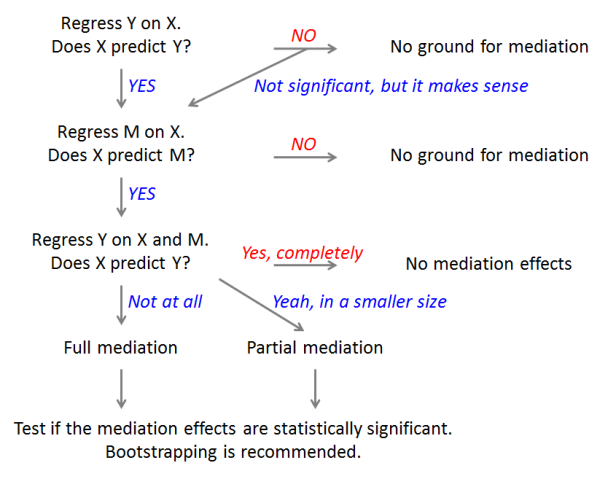